In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# Загрузка изображения

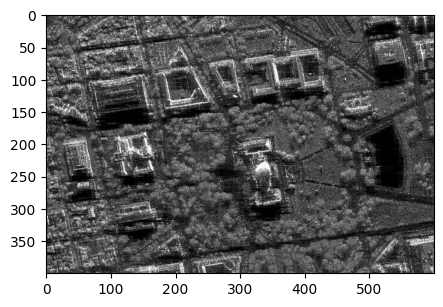

In [2]:
image = cv2.imread("sar_1_gray.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(image, cmap="gray")
plt.show()

# Гисторграмма

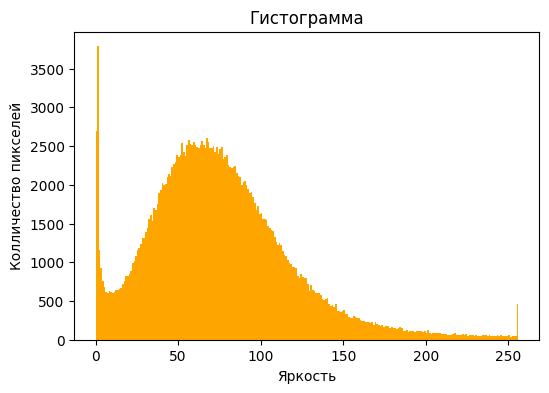

In [3]:
plt.figure(figsize=(6,4))
plt.hist(image.ravel(), bins=256, range=(0,256), color="Orange")
plt.title("Гистограмма")
plt.ylabel("Колличество пикселей")
plt.xlabel("Яркость")
plt.show()

# Алгоритм гамма коррекции (<1, >1)

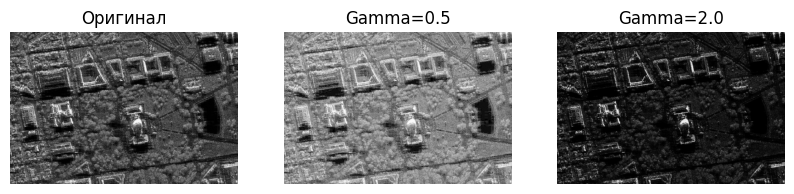

In [4]:
def gamma_correction(img, gamma):
    corrected_pixel = np.power(img / 255.0, gamma) * 255
    return corrected_pixel.astype(np.uint8)

gamma_min = 0.5
gamma_max = 2.0

image_gamma_min = gamma_correction(image, gamma_min)
image_gamma_max = gamma_correction(image, gamma_max)

fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(image, cmap="gray"); axs[0].set_title("Оригинал"); axs[0].axis("off")
axs[1].imshow(image_gamma_min, cmap="gray"); axs[1].set_title(f"Gamma={gamma_min}"); axs[1].axis("off")
axs[2].imshow(image_gamma_max, cmap="gray"); axs[2].set_title(f"Gamma={gamma_max}"); axs[2].axis("off")
plt.show()

# Сравнение исходного изображения и измененного при помощи гамма фильтра (MSE, SSIM)

Gamma=0.5: MSE=3250.4291, SSIM=0.7734
Gamma=2.0: MSE=2383.7636, SSIM=0.5005


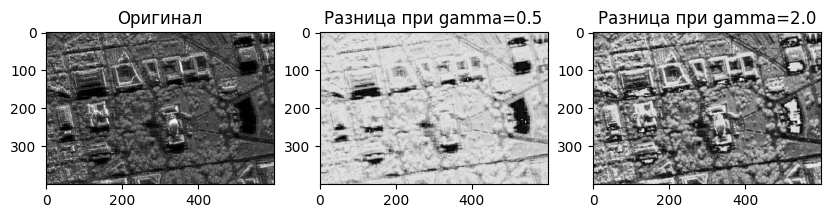

In [5]:
diff = []
for corrected, name in [(image_gamma_min, f"Gamma={gamma_min}"),
                        (image_gamma_max, f"Gamma={gamma_max}")]:
    mse = mean_squared_error(image, corrected)
    ssim, d = structural_similarity(image, corrected, full=True, win_size=3, data_range=255)
    diff.append((d * 255).astype("uint8"))
    print(f"{name}: MSE={mse:.4f}, SSIM={ssim:.4f}")
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(image, cmap="gray"); axs[0].set_title("Оригинал")
axs[1].imshow(diff[0], cmap="gray"); axs[1].set_title(f"Разница при gamma={gamma_min}")
axs[2].imshow(diff[1], cmap="gray"); axs[2].set_title(f"Разница при gamma={gamma_max}")
plt.show()

# Алгоритм статистической цветокоррекции на основе статистики eq_gray

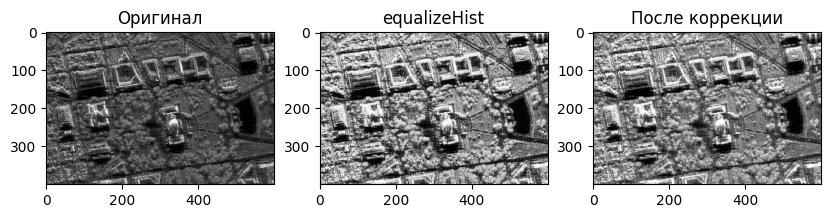

In [6]:
eq_gray = cv2.equalizeHist(image)
def stat_corr_algo(src, ref):
    mean_src = src.mean()
    std_src = src.std()

    mean_ref = ref.mean()
    std_ref = ref.std()

    stat_corrected = (src - mean_src) * (std_ref/std_src) + mean_ref
    return np.clip(stat_corrected, 0, 255).astype(np.uint8)

image_matched = stat_corr_algo(image, eq_gray)

fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(image, cmap="gray"); axs[0].set_title("Оригинал")
axs[1].imshow(eq_gray, cmap="gray"); axs[1].set_title("equalizeHist")
axs[2].imshow(image_matched, cmap="gray"); axs[2].set_title("После коррекции")
plt.show()

# Работа алгоритмов пороговой фильтрации с различными параметрами

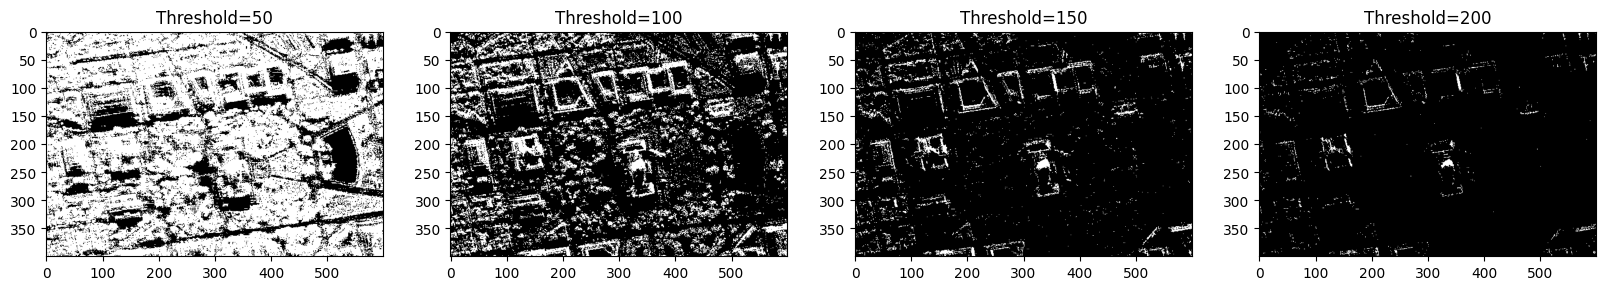

In [7]:
thresh_values = [50, 100, 150, 200]
fig, axs = plt.subplots(1, len(thresh_values), figsize=(20,5))
for i, t in enumerate(thresh_values):
    _, thresh_img = cv2.threshold(image, t, 255, cv2.THRESH_BINARY)
    axs[i].imshow(thresh_img, cmap="gray")
    axs[i].set_title(f"Threshold={t}")
plt.show()